In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from interaction_permutation_importance import *

In [2]:
def visualize_result(result, ax = None):
    df = pd.DataFrame(result['importances']).T
    df.columns = result['variable_names']
    if ax:
        df.plot.box(ax = ax)
    else:
        df.plot.box()

In [3]:
def confidence_interval(result):
    interval =  [f"{x.round(3)}" + "-" f"{y.round(3)}" for x, y in zip(result['importances_mean']-  result['importances_me'], result['importances_mean'] +  result['importances_me'])]
    colnames = result['variable_names']
    df = pd.DataFrame(interval).T
    df.columns = colnames
    df.index = ['confidence interval']
    return df

In [4]:
def gen_X(num_var: int, sample_size : int):
    data_dictionary = {}
    for i in range(num_var):
        var_name = "x" + f"{i + 1}"
        data_dictionary[var_name] = list(np.random.binomial(1, .5, sample_size))
    return pd.DataFrame(data_dictionary)


# Experiment 1

There is no interaction effects

### Experiment 1-1 Only one main effect

In [5]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

In [6]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)

DecisionTreeRegressor(ccp_alpha=0.05)

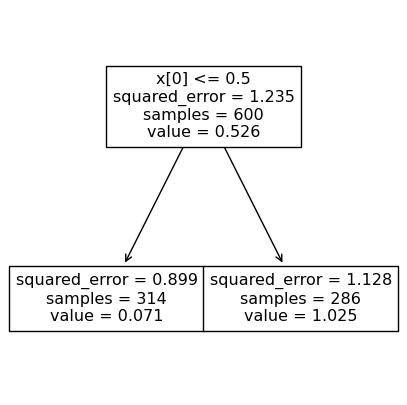

In [7]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))
plot_tree(reg, ax = ax)
plt.show()

In [10]:
result = permutation_importance_together_new(X_test, y_test, model = reg, n_repeats = 10)
result

{'importances_mean': array([0.53277243, 0.        , 0.        , 0.53277243, 0.53277243,
        0.        , 0.53277243]),
 'importances_std': array([0.0377307, 0.       , 0.       , 0.0377307, 0.0377307, 0.       ,
        0.0377307]),
 'importances': array([[0.55704049, 0.51216798, 0.57333542, 0.51444946, 0.49524504,
         0.48766143, 0.500205  , 0.61227197, 0.55126267, 0.52408482],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.55704049, 0.51216798, 0.57333542, 0.51444946, 0.49524504,
         0.48766143, 0.500205  , 0.61227197, 0.55126267, 0.52408482],
        [0.55704049, 0.51216798, 0.57333542, 0.51444946, 0.49524504,
         0.48766143, 0.500205  , 0.61227197, 0.55126267, 0.52408482],
        [0.        , 0.        , 0.        , 0.       

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.459-0.467,0.0-0.0,0.0-0.0,0.46-0.468,0.458-0.466,0.0-0.0,0.46-0.468


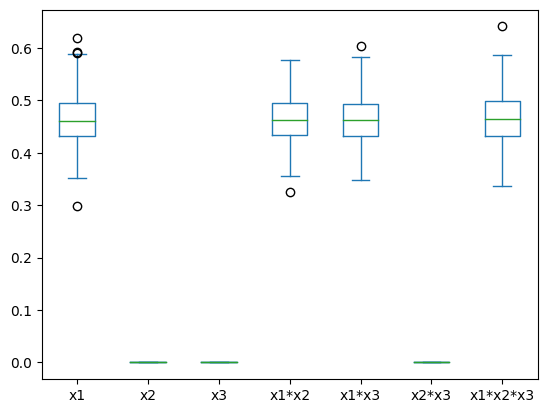

In [8]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.46-0.468,0.0-0.0,0.0-0.0,0.46-0.468,0.464-0.472,0.0-0.0,0.456-0.464


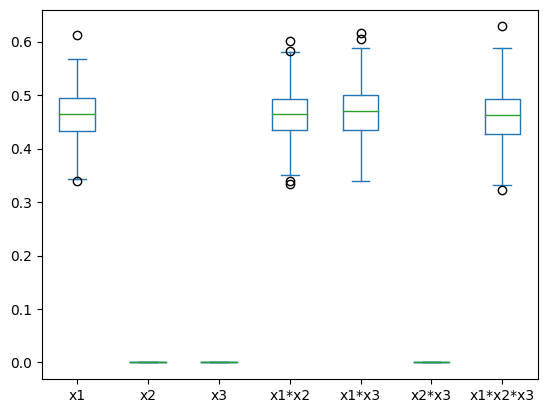

In [9]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Experiment 1-2 Two main effects only

In [10]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

In [11]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)

DecisionTreeRegressor(ccp_alpha=0.05)

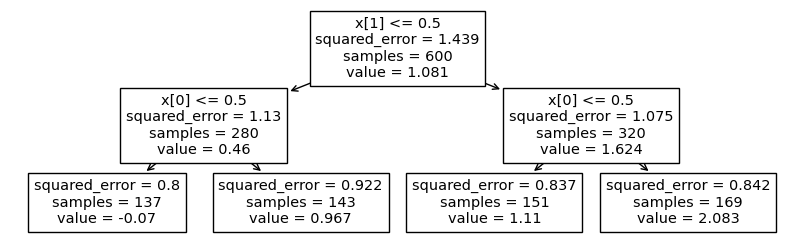

In [12]:
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.504-0.512,0.597-0.606,0.0-0.0,1.075-1.089,0.502-0.509,0.597-0.606,1.074-1.087


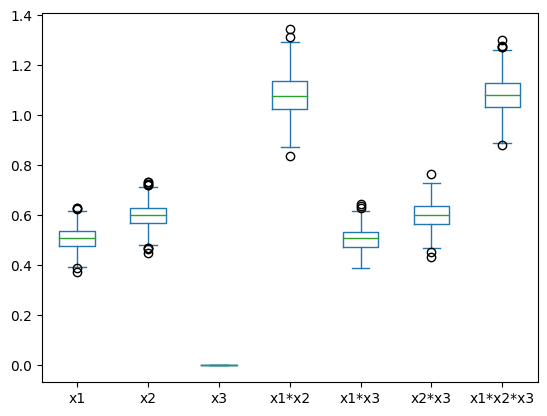

In [13]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.5-0.508,0.597-0.606,0.0-0.0,1.094-1.108,0.502-0.51,0.596-0.604,1.085-1.099


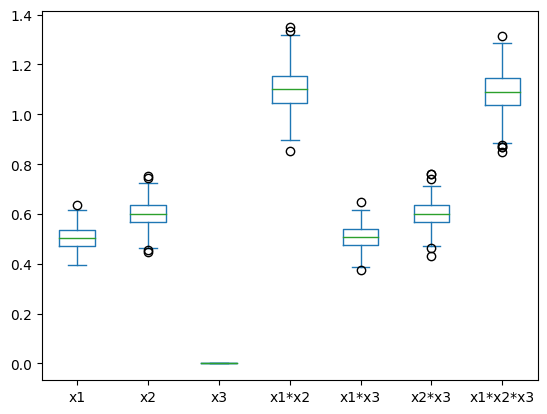

In [15]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

# Experimnt 2: When there are one main effect and one interaction effect

In [35]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 * seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 *seq.x3 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

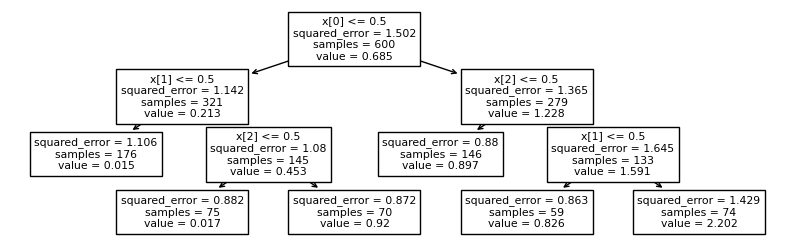

In [36]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.476-0.483,0.269-0.275,0.273-0.279,0.718-0.728,0.746-0.756,0.397-0.404,0.828-0.838


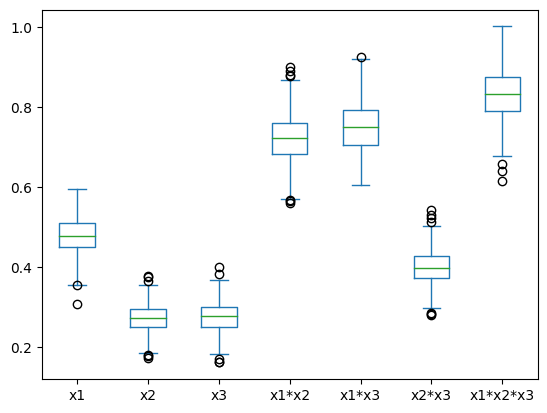

In [37]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.483-0.491,0.267-0.274,0.272-0.279,0.724-0.735,0.736-0.746,0.406-0.413,0.864-0.876


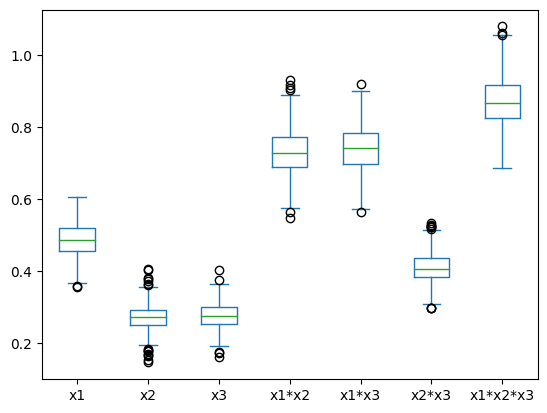

In [38]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Experiment: One main and one interaction effect where the main effect variable is part of the interaction effect

In [20]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 * seq.x1 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq: 1 * (seq.x1) + seq.x2 *seq.x1 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

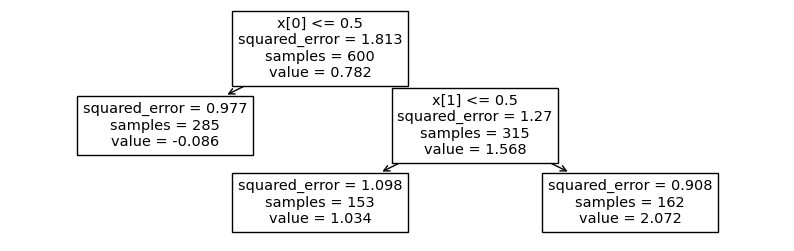

In [21]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.387-1.405,0.276-0.282,0.0-0.0,1.511-1.528,1.388-1.405,0.276-0.282,1.515-1.532


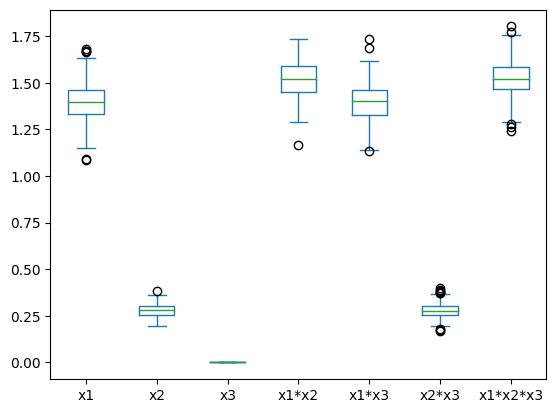

In [22]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.379-1.394,0.278-0.284,0.0-0.0,1.526-1.543,1.383-1.4,0.276-0.282,1.521-1.537


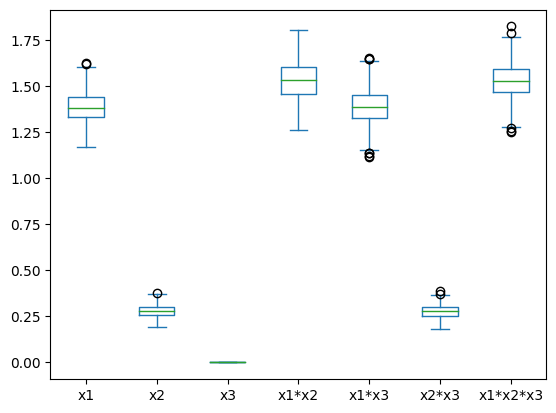

In [23]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Example: x1, x2, and x2*x3

In [24]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq:  1 * (seq.x1) + seq.x2 + seq.x2*seq.x3  + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

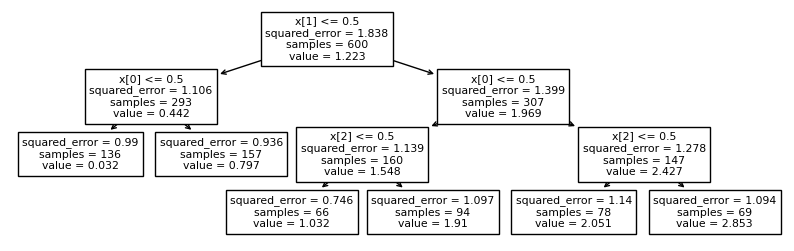

In [25]:
reg = DecisionTreeRegressor(ccp_alpha = 0.03)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.377-0.384,1.282-1.298,0.182-0.187,1.632-1.65,0.585-0.594,1.343-1.359,1.716-1.734


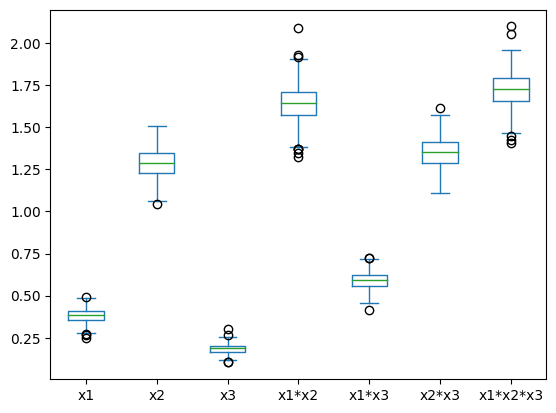

In [26]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,0.371-0.378,1.28-1.295,0.186-0.191,1.64-1.659,0.572-0.582,1.358-1.373,1.744-1.763


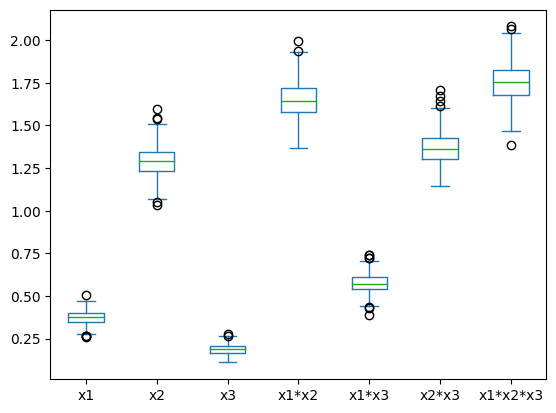

In [27]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

### Example: x1, x2, x1 * x2 and x2*x3

In [28]:
df = gen_X(3, 600)
df['y'] = df.apply(lambda seq: 1 * (seq.x1) + seq.x2 + seq.x1*seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)

df_test = gen_X(3, 600)
df_test['y'] = df_test.apply(lambda seq:  1 * (seq.x1) + seq.x2 + seq.x1*seq.x2 + seq.x2*seq.x3 + np.random.normal(), axis = 1)
X_test = df_test.loc[:,:'x3']
y_test = df_test.y

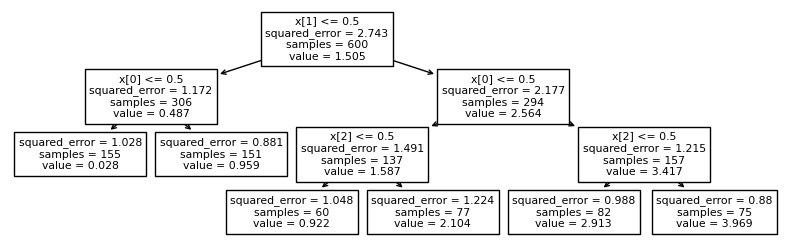

In [29]:
reg = DecisionTreeRegressor(ccp_alpha = 0.05)
reg.fit(df[['x1','x2','x3']], df.y)
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_tree(reg, ax = ax)
plt.show()

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.415-1.431,2.271-2.296,0.349-0.355,3.534-3.565,1.792-1.812,2.503-2.527,3.778-3.812


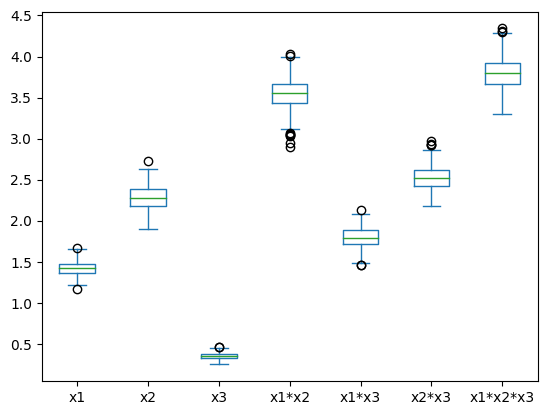

In [30]:
result = permutation_importance_together(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3
confidence interval,1.402-1.418,2.27-2.294,0.345-0.352,3.524-3.561,1.768-1.789,2.47-2.495,3.742-3.776


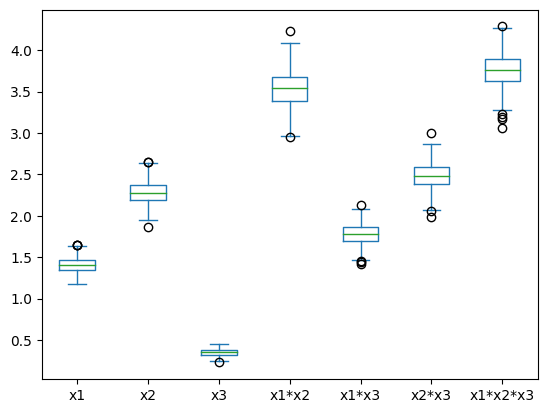

In [31]:
result = permutation_importance_separate(X_test, y_test, model = reg, n_repeats = 500)
visualize_result(result)
confidence_interval(result)

In [32]:
1.418 + 2.294 + 0.352

4.064

In [33]:
2.294 + 0.352

2.646